<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Titanic Survival Prediction

You are a data scientist / AI engineer working on a binary classification problem to predict the survival of passengers from the Titanic crash. You have been provided with a dataset named **`"titanic.csv"`** which includes various features of passengers to predict whether they survived or not. The dataset comprises the following columns:

- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).

Your task is to use this dataset to build and evaluate a `Gaussian Naive Bayes` model to predict whether a passenger survived based on their features. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Import Necessary Libraries**

In [24]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"titanic.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.
5. Drop columns that do not add much value `(passenger_id, name, sib_sp, parch, ticket, cabin, embarked)`.
6. Visualize the distribution of the target variable `survived` and `p_class` using a bar chart.
7. Visualize the distribution of `sex` using a pie chart (percentage).
8. Visualize the distribution of `age` and `fare` using histograms.

In [25]:
# Step 1: Import the data from the "titanic.csv" file and store it in a variable df
df=pd.read_csv('titanic.csv')

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head(5)

(891, 12)


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
# Step 4: Check for any missing values in the dataset
df.isnull().sum()

,0
passenger_id,0
name,0
p_class,0
sex,0
age,177
sib_sp,0
parch,0
ticket,0
fare,9
cabin,687


In [27]:
# Step 5: Drop columns that do not add much value (passenger_id, name, sib_sp, parch, ticket, cabin, embarked)
df=df.drop(['passenger_id','name','sib_sp','parch','ticket','cabin','embarked'],axis=1)

In [28]:
df.head()

,p_class,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,NaN,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


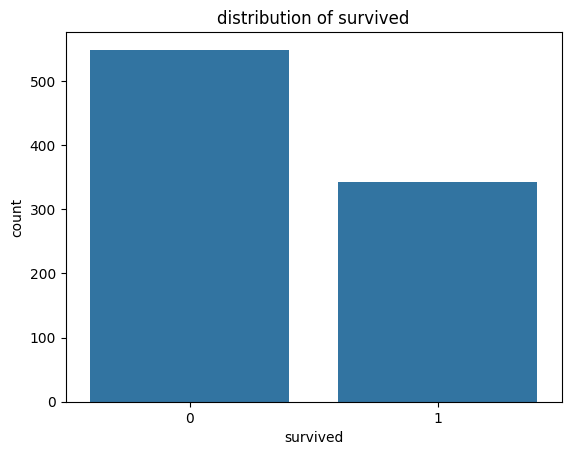

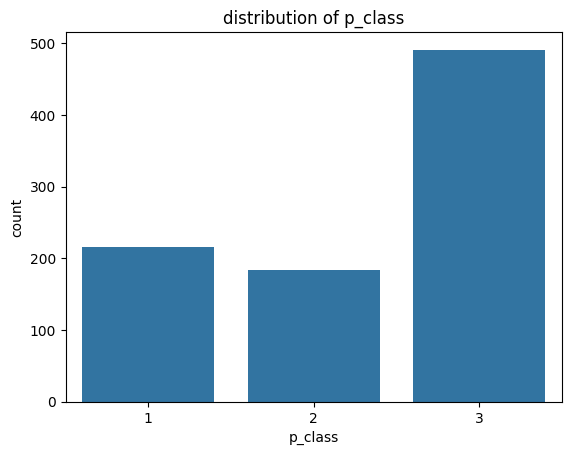

In [29]:
# Step 6: Visualize the distribution

#'survived'
sns.countplot(x='survived',data=df)
plt.xlabel('survived')
plt.ylabel('count')
plt.title('distribution of survived')
plt.show()

# 'p_class'
sns.countplot(x='p_class',data=df)
plt.xlabel('p_class')
plt.ylabel('count')
plt.title('distribution of p_class')
plt.show()

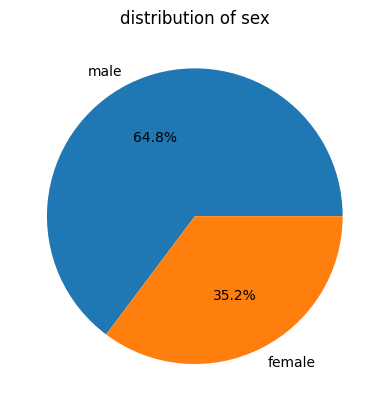

In [30]:
# Step 7: Visualize the distribution of 'sex' using a pie chart (percentage)
plt.pie(df['sex'].value_counts(),labels=df['sex'].value_counts().index,autopct='%1.1f%%')
plt.title('distribution of sex')
plt.show()

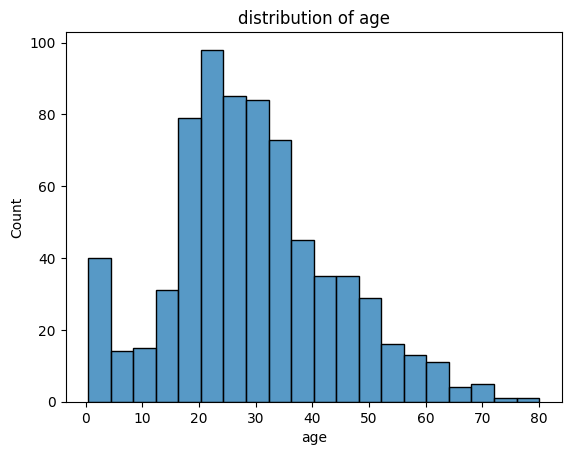

In [31]:
# Step 8: Visualize the distribution of 'age' using a histogram
sns.histplot(df['age'])
plt.title('distribution of age')
plt.show()

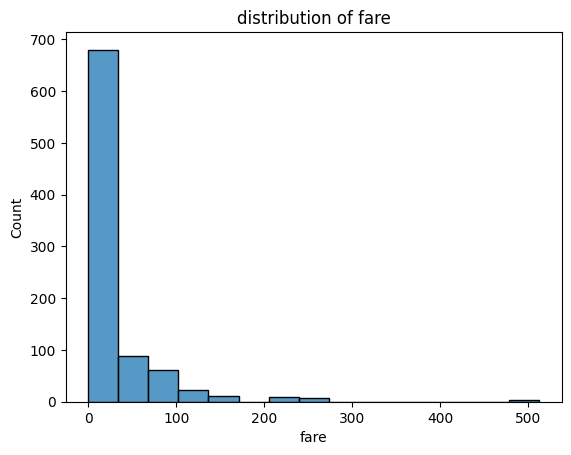

In [32]:
# Step 9: Visualize the distribution of 'fare' using a histogram
sns.histplot(df.fare,bins=15)
plt.title('distribution of fare')
plt.show()

### Task 2: Data Preprocessing

1. Fill in missing values in the `age and fare` columns with their median values.
2. Encode the sex column using one-hot encoding.
3. Standardize the fare column using StandardScaler.
4. Select the features `(p_class, sex, age, fare)` and the target variable `(survived)` for modeling.
5. Split the dataset into training and testing sets with a test size of 30%.

In [33]:
# Step 1: Fill in missing values in the 'age' and 'fare' columns with their median values
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
df.isnull().sum()

<ipython-input-33-48c102a4e135>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
<ipython-input-33-48c102a4e135>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
p_class,0
sex,0
age,0
fare,0
survived,0


In [34]:
# Step 2: Encode the 'sex' column using one-hot encoding
df=pd.get_dummies(df,columns=['sex'],drop_first=True)
df.head()

,p_class,age,fare,survived,sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False
2,3,26.0,14.4542,1,False
3,1,35.0,53.1000,1,False
4,3,35.0,8.0500,0,True


In [36]:
# Step 3: Standardize the 'fare' column using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['fare']=sc.fit_transform(df[['fare']])
df.head(5)


,p_class,age,fare,survived,sex_male
0,3,22.0,-0.500819,0,True
1,1,38.0,0.788518,1,False
2,3,26.0,-0.355760,1,False
3,1,35.0,0.422390,1,False
4,3,35.0,-0.484711,0,True


In [51]:
# Step 4: Select the features and target variable for modeling
features = ['p_class', 'sex_male', 'age', 'fare']
X = df[features]
y=df['survived']

# Step 5: Split the dataset into training and testing sets with a test size of 30%
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=42)


### Task 3: Model Training Using Gaussian Naive Bayes

1. Initialize and train a `Gaussian Naive Bayes` model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Visualize the confusion matrix for the model.

In [52]:
# Step 1: Initialize and train a Gaussian Naive Bayes model using the training data
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred=model.predict(X_test)

In [53]:
print(model.score(X_test,y_test))

0.7752808988764045


In [54]:
# Step 3: Evaluate the model using a classification report and print the report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       392
           1       0.69      0.71      0.70       231

    accuracy                           0.78       623
   macro avg       0.76      0.76      0.76       623
weighted avg       0.78      0.78      0.78       623



In [49]:
# Step 4: Visualize the confusion matrix for the model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[318  74]
 [ 66 165]]


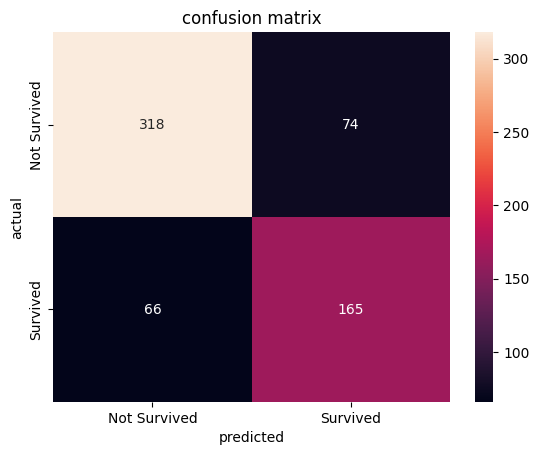

In [50]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()